# MLP MNIST
Hier werden das erste Mal im MNIST nun Algotihmen aus dem 
Multilayer Perceptron (MLP) for multi-class softmax classification:

In [4]:
# Import Libraries
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.models import model_from_json
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
# Hyperparamter Upfront 
batch_size = 128 # Bei MNIST wähle ich die 128 immer ident
num_classes = 10 # Vorgabe aus Datensatz
epochs = 50 # Wird in allen Modellen geählt

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# Für MLP brauch ich einen Eingangsvektor => Reshaping

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
x_train = x_train.reshape(60000, 784) # MLP benötigt InputVektor und keine Matrix => reshape
x_test = x_test.reshape(10000, 784) # MLP benötigt InputVektor und keine Matrix => reshape
x_train = x_train.astype('float32') # Standard 
x_test = x_test.astype('float32') # Standard 
x_train /= 255 # skalieren
x_test /= 255 # Skalieren

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#Datenvektorisierung
y_train = keras.utils.to_categorical(y_train, num_classes) # Standard bei NN
y_test = keras.utils.to_categorical(y_test, num_classes)# Standard bei NN

60000 train samples
10000 test samples


In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [9]:
# Prüfen ob bereits ein Model bereits trainiert und gespeichert ist, im Falle, dass noch kein Modell vorliegt neu erstellen
modelMLP = Path("./MODEL/modelMLP.json")
if modelMLP.is_file():
   # load json and create model
    json_file = open('./MODEL/modelMLP.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    modelMLP = model_from_json(loaded_model_json)
    # load weights into new model
    modelMLP.load_weights("./MODEL/modelMLP.h5")
    print("Loaded model from disk")
else:
    modelMLP = Sequential()
    modelMLP.add(Dense(512, activation='relu', input_shape=(784,)))
    modelMLP.add(Dropout(0.2))
    modelMLP.add(Dense(512, activation='relu'))
    modelMLP.add(Dropout(0.2))
    modelMLP.add(Dense(num_classes, activation='softmax')) # hier der letzte Layer hat die Anzahl der möglichen klassen & die Softmax Aktivierung
    modelMLP.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
#
modelMLP.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


In [11]:
# Ausführen des Modelles
history = modelMLP.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, # show training progress during training Possible = 0,1,2
                    validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 184us/step - loss: 0.2445 - accuracy: 0.9242 - val_loss: 0.1098 - val_accuracy: 0.9677
Epoch 2/50
60000/60000 [==============================] - 12s 193us/step - loss: 0.1033 - accuracy: 0.9684 - val_loss: 0.0917 - val_accuracy: 0.9724
Epoch 3/50
60000/60000 [==============================] - 11s 189us/step - loss: 0.0743 - accuracy: 0.9771 - val_loss: 0.0820 - val_accuracy: 0.9788
Epoch 4/50
60000/60000 [==============================] - 12s 195us/step - loss: 0.0600 - accuracy: 0.9819 - val_loss: 0.0945 - val_accuracy: 0.9766
Epoch 5/50
60000/60000 [==============================] - 12s 201us/step - loss: 0.0493 - accuracy: 0.9853 - val_loss: 0.0817 - val_accuracy: 0.9803
Epoch 6/50
60000/60000 [==============================] - 12s 204us/step - loss: 0.0419 - accuracy: 0.9872 - val_loss: 0.0784 - val_accuracy: 0.9816
Epoch 7/50
60000/60000 [==============================]

In [17]:
# Save trained Model to disk via JSON
model_json = modelMLP.to_json()
with open("./MODEL/modelMLP.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelMLP.save_weights("./MODEL/modelMLP.h5")
print("Saved modelMLP to disk")

Saved modelMLP to disk


In [18]:
score = modelMLP.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2103530801721231
Test accuracy: 0.9836999773979187


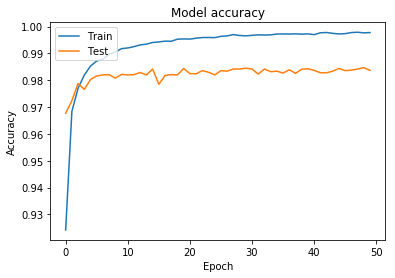

In [19]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

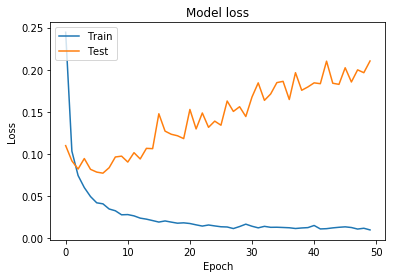

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

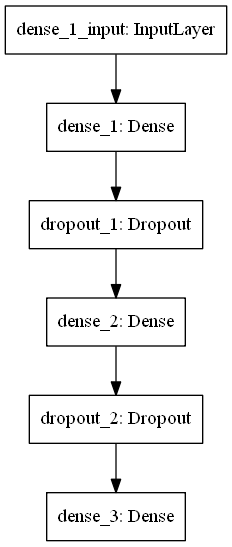

In [21]:

tf.keras.utils.plot_model(
    modelMLP,
    to_file='model.png',
    show_shapes=False,
    show_layer_names=True,
    rankdir='TB'
)